***

# Regressão Linear Múltipla
***

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

In [23]:
# Importação de bibliotecas:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Importando o dataset:

dados = pd.read_csv('data/dados_cerveja_completo.csv', sep = ';')

In [3]:
# Visualização inicial:

dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [4]:
# Verificando o tamanho do dataset:

dados.shape

(365, 7)

## Análises Preliminares:

In [5]:
# Estatísticas Descritivas:

dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


In [6]:
# Matriz de Correlação - Método de Pearson:

dados.corr().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.00,0.86,0.92,0.02,-0.05,0.57
temp_min,0.86,1.00,0.67,0.10,-0.06,0.39
temp_max,0.92,0.67,1.00,-0.05,-0.04,0.64
chuva,0.02,0.10,-0.05,1.00,0.00,-0.19
fds,-0.05,-0.06,-0.04,0.00,1.00,0.51
consumo,0.57,0.39,0.64,-0.19,0.51,1.00


#### O que os dados sobre a correlação da variável 'consumo' sugerem:

* correlação consumo x temp_max: correlação positiva. Pode sugerir um maior consumo em dias quentes.
* correlação consumo x chuva: correlação negativa. Pode sugerir que o consumo diminua em dias chuvosos.
* correlação consumo x fds: correlação forte. Pode sugerir que o consumo aumenta nos finais de semana.

## Análises Gráficas:

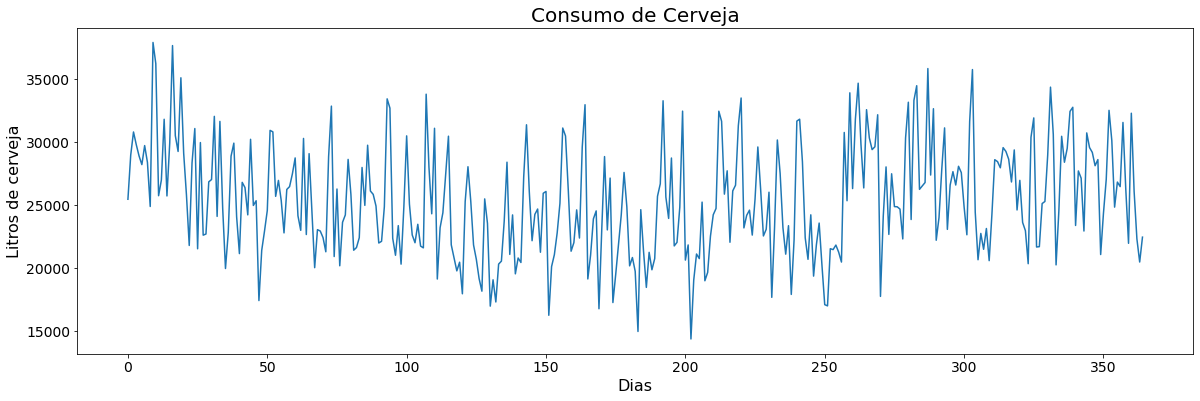

In [8]:
fig, ax = plt.subplots(figsize = (20,6))

ax.set_title('Consumo de Cerveja', fontsize = 20)
ax.set_ylabel('Litros de cerveja', fontsize = 16)
ax.set_xlabel('Dias', fontsize = 16)
ax = dados['consumo'].plot(fontsize = 14)

## Boxplots:

Text(0.5, 0, 'Litros')

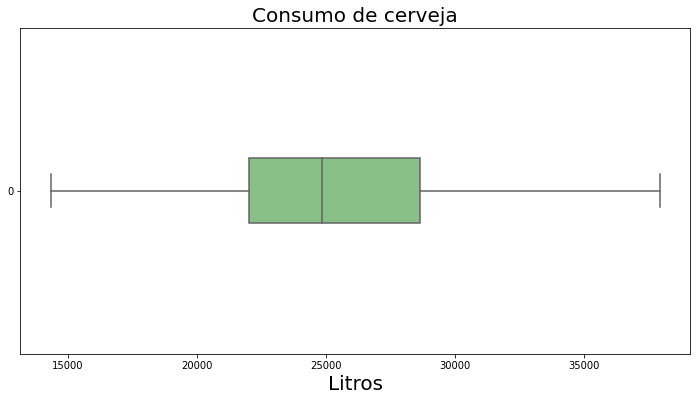

In [13]:
# Consumo de cerveja:

ax = sns.boxplot(data = dados['consumo'], orient = 'h', width = 0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de cerveja', fontsize = 20)
ax.set_xlabel('Litros', fontsize = 20)

#### Não parecem haver grandes variações ou outliers presentes no dataset.

Text(0, 0.5, 'Final de Semana')

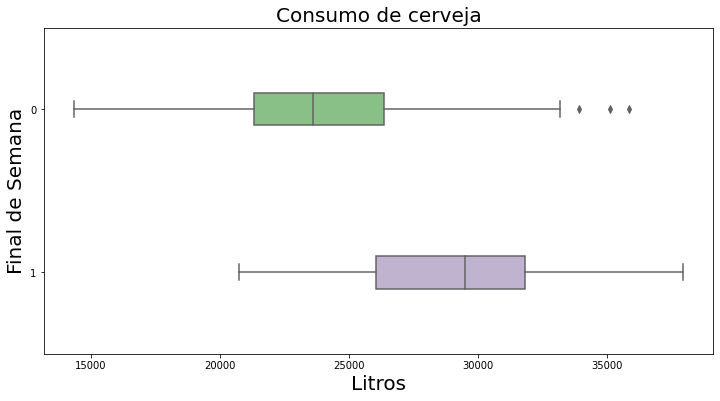

In [14]:
# Investigando o consumo de Cerveja (variável dependente - y) em dias "normais"(de segunda a sexta) e em finais de semana:

# 0: Dias da semana
# 1: Finais de Semana

ax = sns.boxplot(x = 'consumo', y = 'fds', data = dados, orient = 'h', width = 0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de cerveja', fontsize = 20)
ax.set_xlabel('Litros', fontsize = 20)
ax.set_ylabel('Final de Semana', fontsize = 20)

#### Nota-se que o consumo de cerveja tende a aumentar nos finais de semana.

## Distribuição de frequências da variável dependente (y): Consumo de cerveja

Text(0, 0.5, 'Consumo de Cerveja (Litros)')

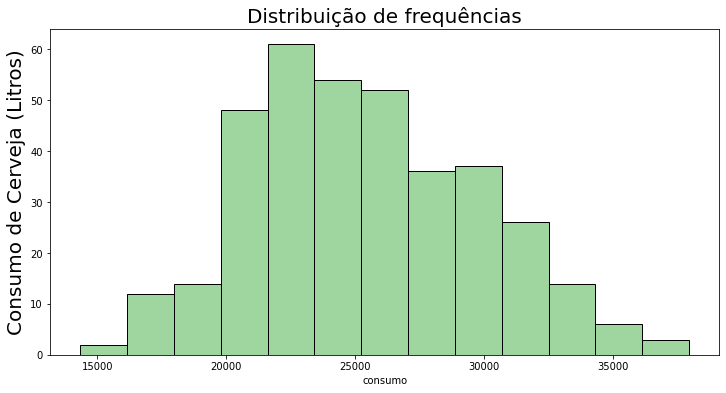

In [16]:
ax = sns.histplot(dados['consumo'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequências', fontsize = 20)
ax.set_ylabel('Consumo de Cerveja (Litros)', fontsize = 20)

#### A distribuição de frequências da variável 'consumo' parece estar distribuída normalmente. No entanto, são necessários testes mais formais para determinar se a distribuição é ou não normal.

## Dispersão entre as variáveis:

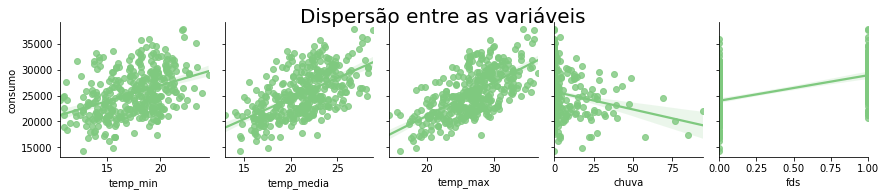

In [17]:
ax = sns.pairplot(dados, y_vars = 'consumo', x_vars = ['temp_min','temp_media','temp_max','chuva', 'fds'], kind = 'reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize = 20, y=1.05)
ax

#### Nota-se que:

* A variável 'consumo' tem relação com as veriáveis de temperatura. Esta relação, notadamente, é mais forte com a variável 'temp_max'.

* A variável 'chuva' te influência inversa sobre o consumo.

* O consumo parece aumentar aos finais de semana.

## Jointplot com a reta de regressão estimada:

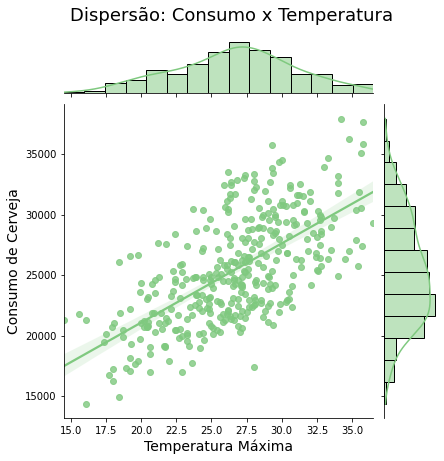

In [18]:
ax = sns.jointplot(x = 'temp_max', y = 'consumo', data = dados, kind = 'reg')
ax.fig.suptitle('Dispersão: Consumo x Temperatura', fontsize = 18, y=1.05)
ax.set_axis_labels('Temperatura Máxima', 'Consumo de Cerveja', fontsize = 14)
ax

## Consumo x Temperatura x Final de Semana:

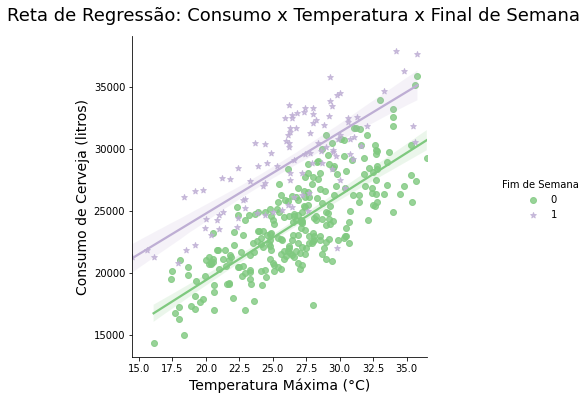

In [19]:
ax = sns.lmplot(x = 'temp_max', y = 'consumo', data = dados, hue = 'fds', markers = ['o', '*'], legend = False )
ax.fig.suptitle('Reta de Regressão: Consumo x Temperatura x Final de Semana', fontsize = 18, y=1.05)
ax.set_xlabels('Temperatura Máxima (°C)', fontsize = 14)
ax.set_ylabels('Consumo de Cerveja (litros)', fontsize = 14)
ax.add_legend(title = 'Fim de Semana')
ax

## Estimando o modelo de regressão linear:

In [21]:
# Preparação das variáveis:

# De acordo com a análise gráfica realizada, foram escolhidas as variáveis independentes (X) abaixo para o modelo:

y = dados['consumo']
X = dados[['temp_max','chuva', 'fds']]

In [22]:
# Separação dos dados em dados de treino e dados de teste:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [36]:
# Criação do modelo:

modelo = LinearRegression()

In [25]:
# Treinando o modelo:

modelo.fit(X_train, y_train)

LinearRegression()

In [26]:
# Calculando o R2 que obtive com meus dados de teste:

R2 = modelo.score(X_train, y_train).round(2)
print(f'R2 = {R2}')

R2 = 0.73


## Obtendo os coeficientes de regressão estimados:

In [31]:
intercepto = modelo.intercept_
coeficientes = modelo.coef_

In [33]:
parametros = pd.DataFrame(data = np.append(intercepto,coeficientes), index = ['Intercepto','Temp. Máx','Chuva', 'Final de Semana'], columns = ['Parâmetros'])
parametros

,Parâmetros
Intercepto,5951.976339
Temp. Máx,684.736759
Chuva,-60.782435
Final de Semana,5401.083339


#### Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

## Gerando as previsões do modelo para os dados de TREINO

In [34]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

<AxesSubplot:title={'center':'Previsão x Real'}, xlabel='Consumo de Cerveja (litros) - Previsto', ylabel='Consumo de Cerveja (litros) - Real'>

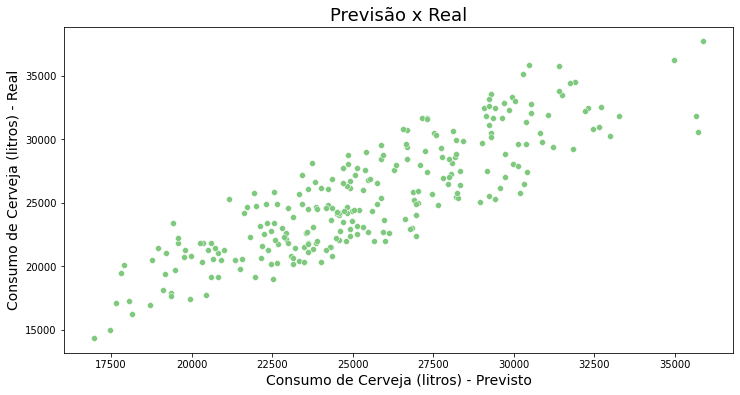

In [35]:
ax = sns.scatterplot(x = y_previsto_train, y = y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão x Real', fontsize = 18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsto', fontsize =14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize = 14)
ax

## Obtendo os resíduos:

In [44]:
residuo = y_train - y_previsto_train

## Gráfico de dispersão entre valor estimado e resíduos:

<AxesSubplot:title={'center':'Resíduos x Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsto', ylabel='Resíduos'>

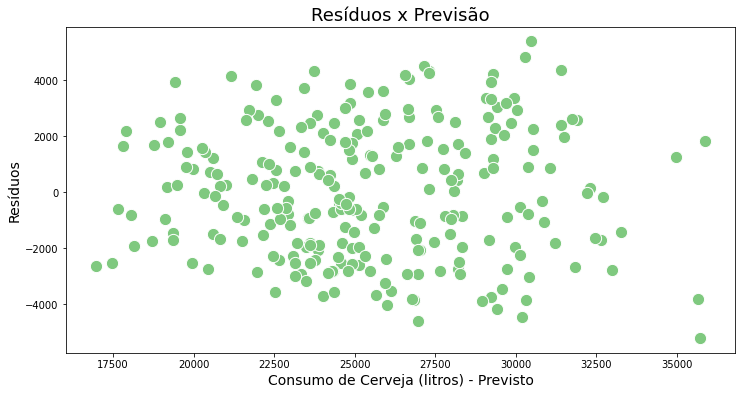

In [46]:
ax = sns.scatterplot(x = y_previsto_train, y = residuo, s = 150)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos x Previsão', fontsize = 18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsto', fontsize =14)
ax.set_ylabel('Resíduos', fontsize = 14)
ax

## Gerando uma previsão pontual:

In [29]:
temp_max = 40
chuva = 0
fds = 1

entrada = [[temp_max, chuva, fds]]
print(f'De acordo com os dados de entrada, o consumo de cerveja será de {modelo.predict(entrada)[0].round(2)} litros.')

De acordo com os dados de entrada, o consumo de cerveja será de 38742.53 litros.
